In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
df_train= pd.read_csv('Arabic Sentiment Analysis Dataset - SS2030.csv')
df_train.head()

,text,Sentiment
0,حقوق المرأة 💚💚💚 https://t.co/Mzf90Ta5g1,1
1,RT @___IHAVENOIDEA: حقوق المرأة في الإسلام. ht...,1
2,RT @saud_talep: Retweeted لجنة التنمية بشبرا (...,1
3,RT @MojKsa: حقوق المرأة التي تضمنها لها وزارة ...,1
4,RT @abm112211: ولي امر الزوجة او ولي الزوجة او...,1


In [31]:
#number of positive and negative reviews
df_train['Sentiment'].value_counts()

Sentiment
1    2436
0    1816
Name: count, dtype: int64

In [32]:
import aranorm
df_train['text']=df_train['text'].apply(aranorm.normalize_tweet)
df_train

,text,Sentiment
0,حقوق المراه يوجدرابط,1
1,حقوق المراه في الاسلام يوجدرابط,1
2,لجنه التنميه بشبرا ما زال التسجيل مستمر في دور...,1
3,حقوق المراه التي تضمنها لها وزاره العدل يوجدرابط,1
4,ولي امر الزوجه او ولي الزوجه او ولي المراه من ...,1
...,...,...
4247,غرد بحبك لمحمد بن سلمان,1
4248,غرد بحبك لمحمد بن سلمان محمدبن سلمان احبه الله...,1
4249,غرد بحبك لمحمد بن سلمان الله يحفظك يا ذخر الوط...,1
4250,غرد بحبك لمحمد بن سلمان الله يحفظه ويحميه ويقو...,1


In [33]:
! pip install --upgrade pip
! pip install nltk

In [34]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

In [35]:
#over sampling
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split


# Load your dataset (assuming you have it in a DataFrame format)
# Replace the following line with code to load your dataset
# df_train = pd.read_csv('your_dataset.csv')
# df_train.head()
nltk.download('stopwords')
nltk.download('punkt')
# Define maximum sequence length and vocabulary size
max_len = 300
vocab_size = 10000

# Define a list of Arabic stopwords outside of the Numba-compiled function
arabic_stopwords = list(set(stopwords.words('arabic')))

# Tokenize Arabic text using NLTK's word_tokenize
# You can further customize this tokenizer as needed
def tokenize_text(text):
    return word_tokenize(text)

df_train['tokenized_text'] = df_train['text'].apply(tokenize_text)

[nltk_data] Downloading package stopwords to /Users/hneen/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/hneen/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [36]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import to_categorical

# Tokenize the text
tokenizer = Tokenizer(num_words=vocab_size)
tokenizer.fit_on_texts(df_train['tokenized_text'])
sequences = tokenizer.texts_to_sequences(df_train['tokenized_text'])

# Pad the sequences
data_padded = pad_sequences(sequences, maxlen=max_len)

# Encode the labels
label_encoder = LabelEncoder()
data_labels = label_encoder.fit_transform(df_train['Sentiment'])
data_labels = to_categorical(data_labels)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(data_padded, data_labels, test_size=0.2, random_state=123)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=123)

In [37]:
# Model parameters
embedding_dim = 128
lstm_units = 64

# Build the LSTMmodel1
LSTMmodel1 = Sequential()
LSTMmodel1.add(Embedding(vocab_size, embedding_dim))
LSTMmodel1.add(LSTM(lstm_units))
LSTMmodel1.add(Dense(2, activation='sigmoid'))

# Compile the LSTMmodel1
LSTMmodel1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the LSTMmodel1
history = LSTMmodel1.fit(X_train, y_train, batch_size=32, epochs=10, validation_data=(X_val, y_val))

# Evaluate the LSTMmodel1
loss, accuracy = LSTMmodel1.evaluate(X_test, y_test)
print(f'Test Loss: {loss}, Test Accuracy: {accuracy}')

Epoch 1/10
85/85 [==============================] - 6s 61ms/step - loss: 0.4859 - accuracy: 0.7390 - val_loss: 0.3508 - val_accuracy: 0.8458
Epoch 2/10
85/85 [==============================] - 6s 65ms/step - loss: 0.1409 - accuracy: 0.9471 - val_loss: 0.3293 - val_accuracy: 0.8590
Epoch 3/10
85/85 [==============================] - 6s 71ms/step - loss: 0.0369 - accuracy: 0.9904 - val_loss: 0.4582 - val_accuracy: 0.8576
Epoch 4/10
85/85 [==============================] - 5s 61ms/step - loss: 0.0351 - accuracy: 0.9893 - val_loss: 0.4997 - val_accuracy: 0.8620
Epoch 5/10
85/85 [==============================] - 6s 68ms/step - loss: 0.0084 - accuracy: 0.9982 - val_loss: 0.5180 - val_accuracy: 0.8605
Epoch 6/10
85/85 [==============================] - 6s 67ms/step - loss: 0.0051 - accuracy: 0.9989 - val_loss: 0.6159 - val_accuracy: 0.8429
Epoch 7/10
85/85 [==============================] - 6s 71ms/step - loss: 0.0022 - accuracy: 0.9996 - val_loss: 0.6970 - val_accuracy: 0.8502
Epoch 8/10
85

In [38]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score

# Use TF-IDF to convert text data to feature vectors
tfidf_vectorizer = TfidfVectorizer(max_features=vocab_size, stop_words=arabic_stopwords)
X_tfidf = tfidf_vectorizer.fit_transform(df_train['text'])

# We will use the label encoded data before converting to categorical
label_encoder = LabelEncoder()
data_labels = label_encoder.fit_transform(df_train['Sentiment'])

# Split the data (using the same random state for consistency)
X_train_tfidf, X_test_tfidf, y_train_tfidf, y_test_tfidf = train_test_split(X_tfidf, data_labels, test_size=0.2, random_state=123)

# Train a Random Forest to find important features
rf_model = RandomForestClassifier(n_estimators=100, random_state=123)
rf_model.fit(X_train_tfidf, y_train_tfidf)

# Feature importances
importances = rf_model.feature_importances_
feature_names = tfidf_vectorizer.get_feature_names_out()

# Sort the features by importance
important_features = sorted(zip(importances, feature_names), reverse=True)[:200]  # Select top 200 features

# Print or plot the important features
print("Top important features:", important_features[:20])


/Users/hneen/miniconda3/envs/tf_env/lib/python3.11/site-packages/sklearn/feature_extraction/text.py:408: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['آمين', 'أب', 'أخ', 'أفعل', 'أفعله', 'ؤلاء', 'إل', 'إم', 'ات', 'اتان', 'ارتد', 'ان', 'انفك', 'برح', 'تان', 'تبد', 'تحو', 'تعل', 'حد', 'حم', 'حي', 'خب', 'ذار', 'سيما', 'صه', 'ظل', 'ظن', 'عد', 'قط', 'مر', 'مكان', 'مكانكن', 'نب', 'هات', 'هب', 'واها', 'وراء'] not in stop_words.
  warnings.warn(


Top important features: [(0.0542140995098676, 'عطاله'), (0.02376253045277279, 'الصحيه'), (0.023700868794519048, 'التخصصات'), (0.02103240802750488, 'سلمان'), (0.01661868415432122, 'الولايه'), (0.014986682071911204, 'سعوديات'), (0.014944674592699934, 'المراه'), (0.012046700203995396, 'نطلب'), (0.011809511868916357, 'اسقاط'), (0.01132418085435174, 'الشعب'), (0.009935110161853998, 'السفاح'), (0.00965373063731777, 'مهندسون'), (0.00960395605061321, 'قياده'), (0.009451580104437628, 'ضد'), (0.009380805295626293, 'بن'), (0.008303394402082179, 'ومحمد'), (0.007995231225210002, 'غرد'), (0.007091794870299627, 'لمحمد'), (0.0070107533130791344, 'بحبك'), (0.0068918645663276915, 'يوجدرابط')]


In [39]:
# Create a new tokenizer with only the most important words
important_words = [word for _, word in important_features]
tokenizer = Tokenizer(num_words=len(important_words))
tokenizer.fit_on_texts(important_words)

# Apply this new tokenizer to your text data
sequences = tokenizer.texts_to_sequences(df_train['tokenized_text'])
data_padded = pad_sequences(sequences, maxlen=max_len)

# Continue with your existing LSTM model setup


Epoch 1/10
85/85 [==============================] - 6s 56ms/step - loss: 0.4932 - accuracy: 0.7430 - val_loss: 0.3377 - val_accuracy: 0.8385
Epoch 2/10
85/85 [==============================] - 5s 56ms/step - loss: 0.3229 - accuracy: 0.8504 - val_loss: 0.2993 - val_accuracy: 0.8546
Epoch 3/10
85/85 [==============================] - 5s 64ms/step - loss: 0.3049 - accuracy: 0.8588 - val_loss: 0.2939 - val_accuracy: 0.8502
Epoch 4/10
85/85 [==============================] - 6s 71ms/step - loss: 0.2864 - accuracy: 0.8710 - val_loss: 0.2833 - val_accuracy: 0.8634
Epoch 5/10
85/85 [==============================] - 6s 65ms/step - loss: 0.2804 - accuracy: 0.8746 - val_loss: 0.2805 - val_accuracy: 0.8546
Epoch 6/10
85/85 [==============================] - 6s 67ms/step - loss: 0.2701 - accuracy: 0.8787 - val_loss: 0.2899 - val_accuracy: 0.8634
Epoch 7/10
85/85 [==============================] - 6s 70ms/step - loss: 0.2701 - accuracy: 0.8728 - val_loss: 0.2973 - val_accuracy: 0.8517
Epoch 8/10
85

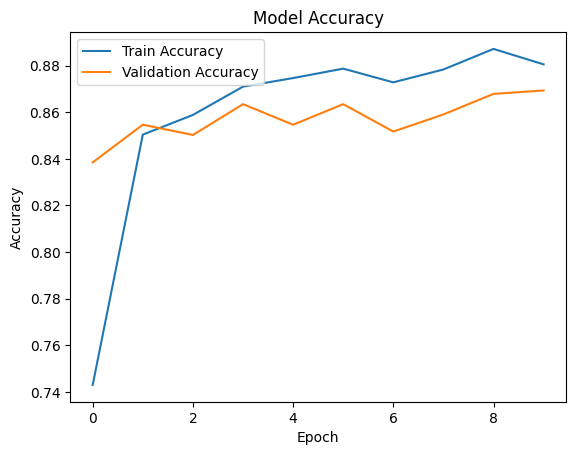

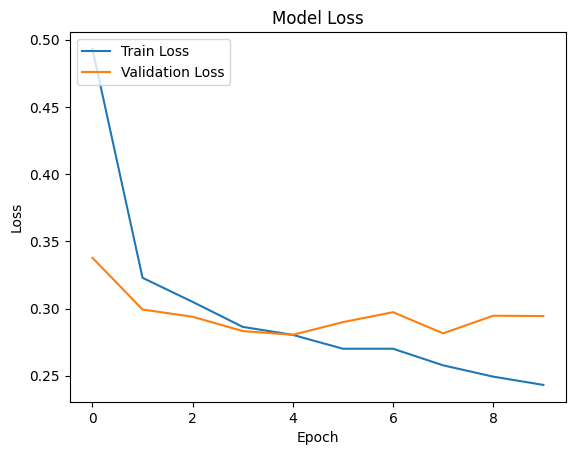

In [40]:
from tensorflow.keras.utils import to_categorical

# Pad the sequences to ensure uniform input size
data_padded = pad_sequences(sequences, maxlen=max_len)

# Re-encode the labels since we are redefining our input
label_encoder = LabelEncoder()
data_labels = label_encoder.fit_transform(df_train['Sentiment'])
data_labels = to_categorical(data_labels)

# Perform train-test split again
X_train, X_test, y_train, y_test = train_test_split(data_padded, data_labels, test_size=0.2, random_state=123)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=123)

# Define the LSTM model architecture
LSTMmodel1 = Sequential()
LSTMmodel1.add(Embedding(len(important_words), embedding_dim))  # Use the length of important_words for vocab size
LSTMmodel1.add(LSTM(lstm_units))
LSTMmodel1.add(Dense(2, activation='sigmoid'))  # Output layer for two classes

# Compile the model
LSTMmodel1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the LSTM model
history = LSTMmodel1.fit(X_train, y_train, batch_size=32, epochs=10, validation_data=(X_val, y_val))

# Evaluate the model
loss, accuracy = LSTMmodel1.evaluate(X_test, y_test)
print(f'Test Loss: {loss}, Test Accuracy: {accuracy}')

# Optionally, plot training history
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()
